# Exploratory Data Analysis

## Importar Pacotes

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Tipos de Dados

## Dados Estruturados
Dados organizados em um formato predefinido, geralmente em tabelas ou bancos de dados relacionais. São armazenados em colunas e linhas, facilitando a consulta e a análise.

**Exemplos:**
- Bancos de dados relacionais (MySQL, PostgreSQL)
- Planilhas (Excel, Google Sheets)
- Dados transacionais (registros de vendas, informações de clientes)

## Tipos de Dados Estruturados

### Contínuos
Dados que podem assumir qualquer valor em um intervalo.

**Sinônimos:** intervalo, flutuação, numérico

### Discretos
Dados que podem assumir apenas valores inteiros, como contagens.

**Sinônimos:** inteiro, contagem

### Categóricos
Dados que podem assumir apenas um conjunto específico de valores representando um conjunto de possíveis categorias.

**Sinônimos:** enumeração, enumerado, fatores, nominal, politômico

### Binários
Um caso especial de dados categóricos com apenas duas categorias de valores (0/1, verdadeiro/falso).

**Sinônimos:** dicotômico, lógico, indicador, booleano

### Ordinais
Dado categórico que tem uma ordem explícita.

**Sinônimo:** fator ordenado

## Dados Não Estruturados
Dados que não seguem um formato ou estrutura predefinida, como textos, imagens, vídeos, e-mails. São mais difíceis de analisar usando métodos convencionais.

**Exemplos:**
- Documentos de texto (Word, PDFs)
- Mídias (fotos, vídeos, áudios)
- E-mails
- Redes sociais (posts, tweets)

## Dados Semiestruturados
Dados que não têm uma estrutura rigorosa, mas contêm tags ou marcadores que organizam os elementos de forma hierárquica.

**Exemplos:**
- XML
- JSON

## Dados Retangulares e Não Retangulares

# Estimativas de Localização

## Média
A soma de todos os valores, dividida pelo número de valores. Sensível a outliers.

**Sinônimo:** média aritmética simples

## Média Ponderada
A soma de todos os valores, multiplicada por um peso e dividida pela soma dos pesos.

**Sinônimo:** média aritmética ponderada

## Mediana
O valor que ocupa a posição central dos dados.

**Sinônimo:** 50° percentil

## Mediana Ponderada
Valor cuja posição está no centro da soma dos pesos, estando metade da soma antes e metade depois desse dado.

## Média Aparada
A média de todos os valores depois da exclusão de um número fixo de valores extremos.

**Sinônimo:** média truncada

## Robusto
Não sensível a valores extremos.

**Sinônimo:** resistente

## Outlier
Um valor de dados que é muito diferente da maioria dos dados.

**Sinônimo:** valor extremo

In [3]:
# Exemplo de dados
dados = np.array([10, 20, 30, 40, 50, 1000])  # Incluindo um outlier (1000)

# 1. Média (Simples)
media = np.mean(dados)
print(f"Média: {media}")

# 2. Média Ponderada
pesos = np.array([1, 1, 1, 1, 1, 0.1])  # Dando menos peso ao outlier
media_ponderada = np.average(dados, weights=pesos)
print(f"Média Ponderada: {media_ponderada}")

# 3. Mediana
mediana = np.median(dados)
print(f"Mediana: {mediana}")

# 4. Mediana Ponderada
dados_ordenados = np.sort(dados)
pesos_ordenados = pesos[np.argsort(dados)]
pesos_acumulados = np.cumsum(pesos_ordenados)
metade_peso = pesos_acumulados[-1] / 2
mediana_ponderada_idx = np.where(pesos_acumulados >= metade_peso)[0][0]
mediana_ponderada = dados_ordenados[mediana_ponderada_idx]
print(f"Mediana Ponderada: {mediana_ponderada}")

# 5. Média Aparada (10% dos valores excluídos)
media_aparada = np.mean(dados[1:-1])  # Excluindo o menor e o maior valor
print(f"Média Aparada: {media_aparada}")


Média: 191.66666666666666
Média Ponderada: 49.01960784313726
Mediana: 35.0
Mediana Ponderada: 30
Média Aparada: 35.0


# Estimativas de Variabilidade

## Desvios
A diferença entre os valores observados e a estimativa de localização.

**Sinônimos:** erros, resíduos

## Variância
A soma dos quadrados dos desvios da média, divididos por \( n - 1 \), em que \( n \) é o número de valores de dados. Em livros de estatística, existe sempre a discussão sobre por que temos \( n - 1 \), em vez de \( n \), no denominador da fórmula de variância, levando ao conceito de graus de liberdade. 

Essa distinção não é importante quando \( n \) é grande, pois não faz muita diferença se você divide por \( n \) ou \( n - 1 \). No entanto, se estiver interessado, o caso é o seguinte: Isso é baseado na premissa de que você quer fazer estimativas de uma população com base em uma amostra. Se utilizarmos o denominador intuitivo de \( n \) na fórmula de variância, subestimaremos o valor real da variância e o desvio-padrão da população. Isso se chama estimativa enviesada. No entanto, se dividirmos por \( n - 1 \), o desvio-padrão se torna uma estimativa não enviesada.

A explicação completa sobre por que o uso de \( n \) leva a uma estimativa enviesada envolve a noção de graus de liberdade, que considera o número de restrições no cálculo de uma estimativa. Nesse caso, existem \( n - 1 \) graus de liberdade, já que há uma restrição: o desvio-padrão depende do cálculo da média da amostra. Em muitos problemas, os cientistas de dados não precisam se preocupar com graus de liberdade, mas existem casos em que o conceito é importante.

**Sinônimo:** erro médio quadrático

## Desvio-padrão
A raiz quadrada da variância. O desvio-padrão é mais fácil de interpretar do que a variância, pois está na mesma escala que os dados originais. 

Embora sua fórmula seja mais complicada e menos intuitiva, o desvio-padrão é preferido na estatística em vez do desvio absoluto médio, devido à teoria estatística: matematicamente, trabalhar com valores quadráticos é mais conveniente do que com valores absolutos, especialmente em modelos estatísticos.

**Sinônimos:** norma \( l_2 \), norma Euclidiana

## Desvio Absoluto Médio
A média do valor absoluto dos desvios da média.

**Sinônimos:** norma \( l_1 \), norma Manhattan

## Desvio Absoluto Mediano da Mediana
A mediana do valor absoluto dos desvios da mediana. Nem a variância, nem o desvio-padrão, nem o desvio absoluto médio são robustos frente a outliers e valores extremos. 

A variância e o desvio-padrão são especialmente sensíveis aos outliers, pois são baseados em desvios quadráticos. Uma estimativa de variabilidade robusta é o desvio absoluto mediano da mediana (MAD).

## Amplitude
A diferença entre o maior e o menor valor no conjunto de dados.

## Estatísticas Ordinais
Métricas baseadas nos valores de dados classificados do menor ao maior.

**Sinônimo:** classificações

## Percentil
Valor tal que \( P \) por cento dos valores assumam esse valor ou menos, e \( (100 - P) \) por cento assumam esse valor ou mais.

**Sinônimo:** quantil

## Amplitude Interquartílica
A diferença entre o 75° percentil e o 25° percentil.

**Sinônimo:** IQR

---

## Ideias Chave
- A variância e o desvio-padrão são as estatísticas de variabilidade mais difundidas e comumente registradas.
- Ambos são sensíveis aos outliers.
- Métricas mais robustas incluem desvios absolutos (médio e mediano) e percentis (quantis).


In [6]:
# Exemplo de dados
dados = np.array([10, 20, 30, 40, 50, 1000])  # Incluindo um outlier (1000)

# 1. Desvios (resíduos)
desvios = dados - np.mean(dados)
print(f"Desvios: {desvios}")

# 2. Variância
variancia = np.var(dados, ddof=1)  # ddof=1 para usar n-1 no denominador
print(f"Variância: {variancia}")

# 3. Desvio-padrão
desvio_padrao = np.std(dados, ddof=1)  # ddof=1 para usar n-1 no denominador
print(f"Desvio-padrão: {desvio_padrao}")

# 4. Desvio Absoluto Médio
desvio_absoluto_medio = np.mean(np.abs(desvios))
print(f"Desvio Absoluto Médio: {desvio_absoluto_medio}")

# 5. Desvio Absoluto Mediano da Mediana (MAD)
mediana = np.median(dados)
desvios_mediana = np.abs(dados - mediana)
mad = np.median(desvios_mediana)
print(f"Desvio Absoluto Mediano da Mediana (MAD): {mad}")

# 6. Amplitude
amplitude = np.ptp(dados)  # ptp = peak to peak (max - min)
print(f"Amplitude: {amplitude}")

# 7. Estatísticas Ordinais (percentis e amplitude interquartílica)
percentil_25 = np.percentile(dados, 25)
percentil_75 = np.percentile(dados, 75)
amplitude_interquartilica = percentil_75 - percentil_25  # Alternativamente: percentil_75 - percentil_25
print(f"25° Percentil: {percentil_25}")
print(f"75° Percentil: {percentil_75}")
print(f"Amplitude Interquartílica (IQR): {amplitude_interquartilica}")

Desvios: [-181.66666667 -171.66666667 -161.66666667 -151.66666667 -141.66666667
  808.33333333]
Variância: 157016.6666666667
Desvio-padrão: 396.2532860010964
Desvio Absoluto Médio: 269.4444444444444
Desvio Absoluto Mediano da Mediana (MAD): 15.0
Amplitude: 990
25° Percentil: 22.5
75° Percentil: 47.5
Amplitude Interquartílica (IQR): 25.0


# Explorando a Distribuição dos Dados

## Boxplot
Um gráfico apresentado por Tukey como um modo rápido de visualizar a distribuição dos dados.

**Sinônimo:** gráfico de caixa e capilar

## Tabela de Frequências
Um registro da contagem de valores numéricos de dados que caem em um conjunto de intervalos (colunas).

## Histograma
Um gráfico da tabela de frequências com as colunas no eixo x e a contagem (ou proporção) no eixo y.

## Gráfico de Densidade
Uma versão simplificada do histograma, frequentemente usado em estimativas de densidade Kernel.


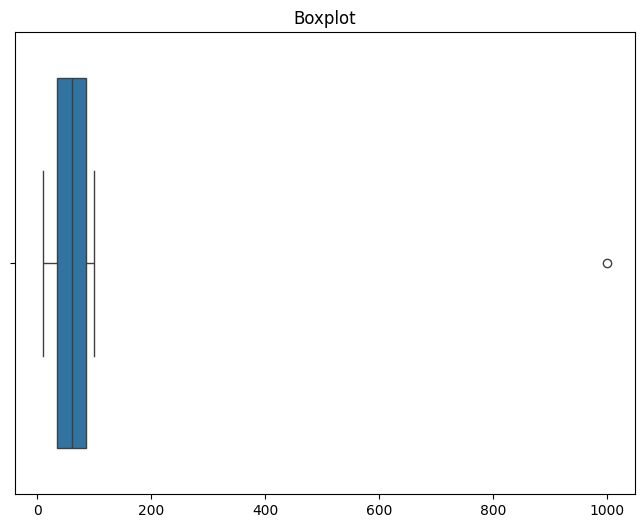

Tabela de Frequências:
(0, 100]       10
(100, 200]      0
(200, 300]      0
(300, 400]      0
(400, 500]      0
(500, 600]      0
(600, 700]      0
(700, 800]      0
(800, 900]      0
(900, 1000]     1
Name: count, dtype: int64


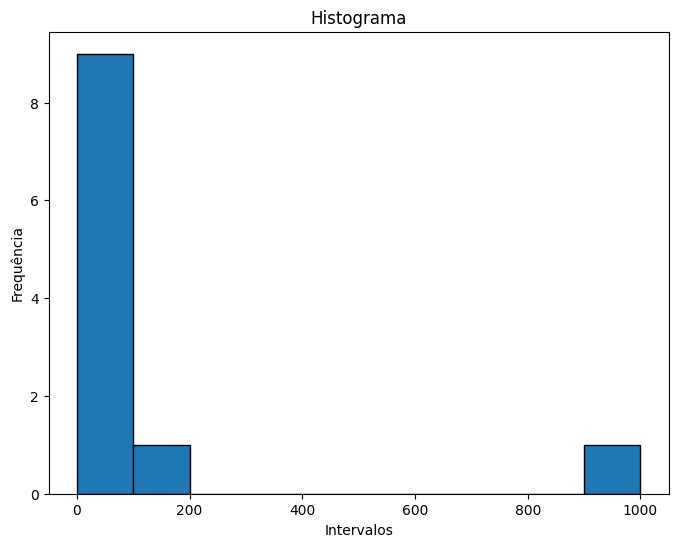

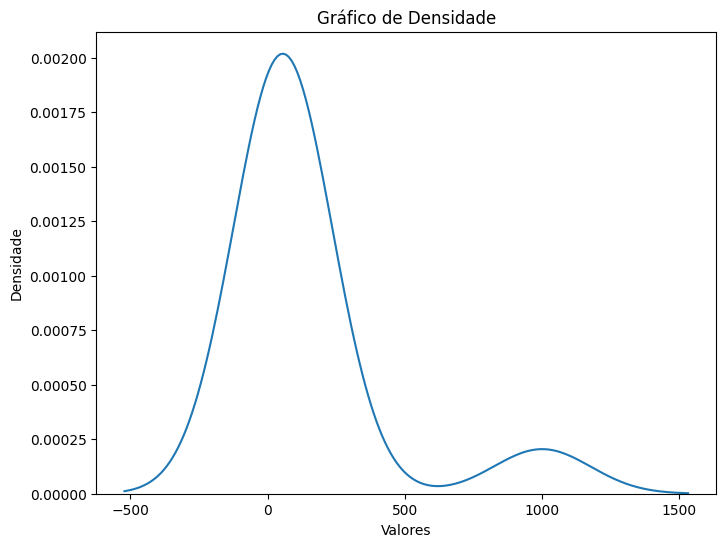

In [10]:
# Exemplo de dados
dados = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 1000])

# 1. Boxplot (Gráfico de Caixa e Capilar)
plt.figure(figsize=(8, 6))
sns.boxplot(x=dados)
plt.title("Boxplot")
plt.show()

# 2. Tabela de Frequências
# Definindo intervalos (bins)
intervalos = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
tabela_frequencias = pd.cut(dados, bins=intervalos).value_counts().sort_index()
print("Tabela de Frequências:")
print(tabela_frequencias)

# 3. Histograma
plt.figure(figsize=(8, 6))
plt.hist(dados, bins=intervalos, edgecolor='black')
plt.title("Histograma")
plt.xlabel("Intervalos")
plt.ylabel("Frequência")
plt.show()

# 4. Gráfico de Densidade
plt.figure(figsize=(8, 6))
sns.kdeplot(dados, bw_adjust=1)
plt.title("Gráfico de Densidade")
plt.xlabel("Valores")
plt.ylabel("Densidade")
plt.show()

# Explorando Variáveis Categóricas

## Moda
A categoria, ou valor, de maior ocorrência em um conjunto de dados.

## Valor Esperado
Quando as categorias podem ser associadas a um valor numérico, isso nos dá um valor médio com base na probabilidade de ocorrência de uma categoria. O valor esperado é a soma dos valores vezes sua probabilidade de ocorrência.

## Gráficos de Barras
A frequência ou proporção de cada categoria representada por barras.

## Gráficos de Pizza
A frequência ou proporção de cada categoria representada por fatias de uma pizza.


Moda: A
Valor Esperado: 3.0


/tmp/ipykernel_40769/1896343366.py:5: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  moda = stats.mode(dados_categoricos, keepdims=True)[0][0]


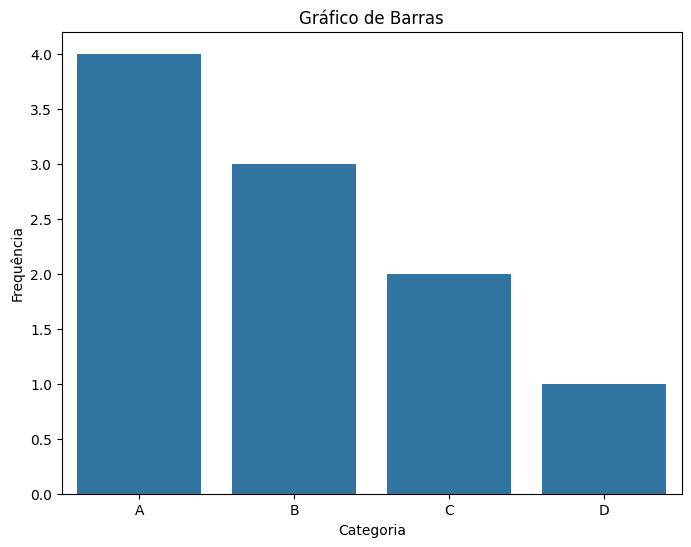

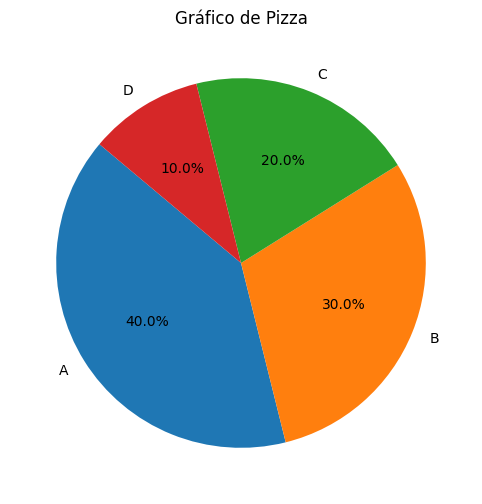

In [15]:
# Exemplo de dados categóricos
dados_categoricos = np.array(['A', 'B', 'A', 'C', 'B', 'A', 'D', 'C', 'B', 'A'])

# 1. Moda
moda = stats.mode(dados_categoricos, keepdims=True)[0][0]
print(f"Moda: {moda}")

# Exemplo de dados numéricos com probabilidades (para valor esperado)
valores = np.array([1, 2, 3, 4, 5])
probabilidades = np.array([0.1, 0.2, 0.4, 0.2, 0.1])

# 2. Valor Esperado
valor_esperado = np.sum(valores * probabilidades)
print(f"Valor Esperado: {valor_esperado}")

# Contagem de frequências para gráficos
contagem_frequencias = pd.Series(dados_categoricos).value_counts()

# 3. Gráficos de Barras
plt.figure(figsize=(8, 6))
sns.barplot(x=contagem_frequencias.index, y=contagem_frequencias.values)
plt.title("Gráfico de Barras")
plt.xlabel("Categoria")
plt.ylabel("Frequência")
plt.show()

# 4. Gráficos de Pizza
plt.figure(figsize=(8, 6))
plt.pie(contagem_frequencias.values, labels=contagem_frequencias.index, autopct='%1.1f%%', startangle=140)
plt.title("Gráfico de Pizza")
plt.show()


# Correlação

## Coeficiente de Correlação
Uma métrica que mede o nível em que as variáveis numéricas estão associadas umas às outras (varia de –1 a +1). Para calcular o coeficiente de correlação de Pearson, multiplicamos os desvios da média da variável 1 pelos da variável 2, e dividimos pelo produto do desvio-padrão. O coeficiente de correlação sempre fica entre +1 (correlação positiva perfeita) e –1 (correlação negativa perfeita). O 0 indica ausência de correlação.

As variáveis podem ter uma associação que não seja linear, e nesse caso o
coeficiente de correlação pode não ser uma métrica útil.

## Matriz de Correlação
Uma tabela na qual as variáveis são mostradas tanto nas linhas quanto nas colunas, e os valores das células representam a correlação entre as variáveis.

## Diagrama de Dispersão
Um gráfico no qual o eixo x representa o valor de uma variável, e o eixo y representa o valor de outra.


Coeficiente de Correlação entre Variavel_1 e Variavel_2: -0.03
Matriz de Correlação:
            Variavel_1  Variavel_2  Variavel_3
Variavel_1    1.000000   -0.034033   -0.037654
Variavel_2   -0.034033    1.000000   -0.146354
Variavel_3   -0.037654   -0.146354    1.000000


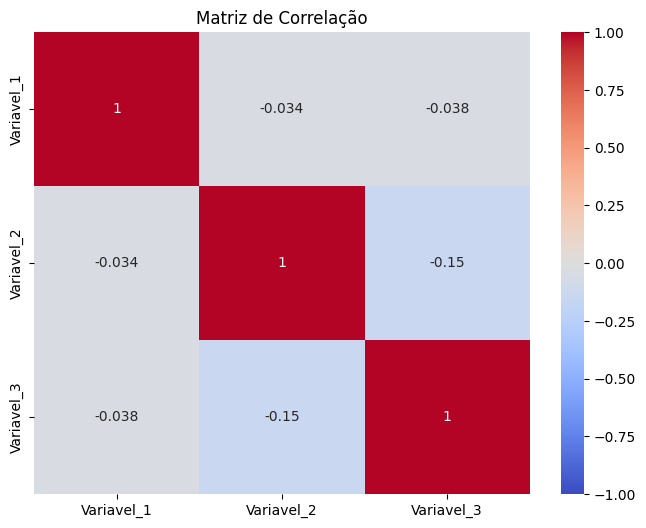

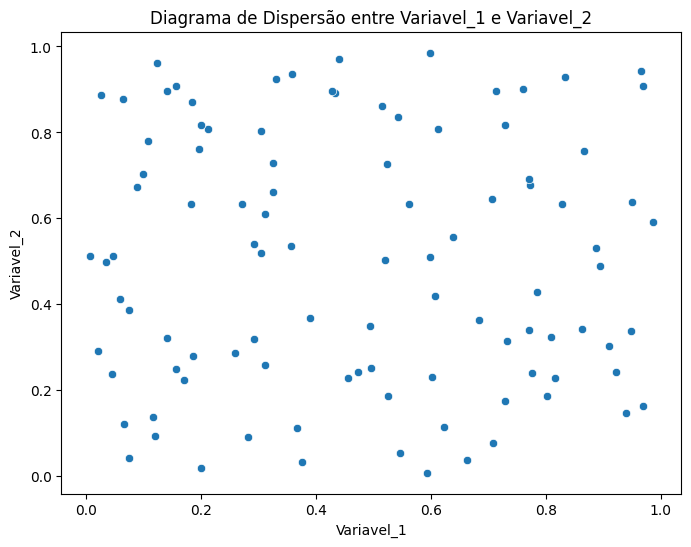

In [17]:
# Exemplo de dados
np.random.seed(42)
dados = pd.DataFrame({
    'Variavel_1': np.random.rand(100),
    'Variavel_2': np.random.rand(100),
    'Variavel_3': np.random.rand(100)
})

# 1. Coeficiente de Correlação
correlacao_v1_v2 = dados['Variavel_1'].corr(dados['Variavel_2'])
print(f"Coeficiente de Correlação entre Variavel_1 e Variavel_2: {correlacao_v1_v2:.2f}")

# 2. Matriz de Correlação
matriz_correlacao = dados.corr()
print("Matriz de Correlação:")
print(matriz_correlacao)

# Plotando a Matriz de Correlação
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matriz de Correlação")
plt.show()

# 3. Diagrama de Dispersão
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Variavel_1', y='Variavel_2', data=dados)
plt.title("Diagrama de Dispersão entre Variavel_1 e Variavel_2")
plt.xlabel("Variavel_1")
plt.ylabel("Variavel_2")
plt.show()

# Explorando Duas ou Mais Variáveis

## Tabelas de Contingência
Um registro das contagens entre duas ou mais variáveis categóricas.

## Compartimentação Hexagonal
O gráfico de duas variáveis métricas com os registros compartimentados em hexágonos.

## Gráficos de Contorno
Um gráfico mostrando a densidade de duas variáveis numéricas como um mapa topográfico.

## Gráficos Violino
Semelhante a um boxplot, mas mostrando a estimativa de densidade.

## Ideias Chave

* Compartimentação hexagonal e gráficos de contorno são ferramentas úteis que permitem o estudo gráfico de duas variáveis numéricas por vez, sem ficar sobrecarregados por quantidades enormes de dados.

* As tabelas de contingência são a ferramenta-padrão para a observação de contagens de duas variáveis categóricas.

* Boxplots e gráficos violinos permitem o registro de uma variável numérica contra uma variável categórica.


Tabela de Contingência:
Categoria_2   X   Y   Z
Categoria_1            
A            11   7  10
B            25   6   9
C             9  11  12


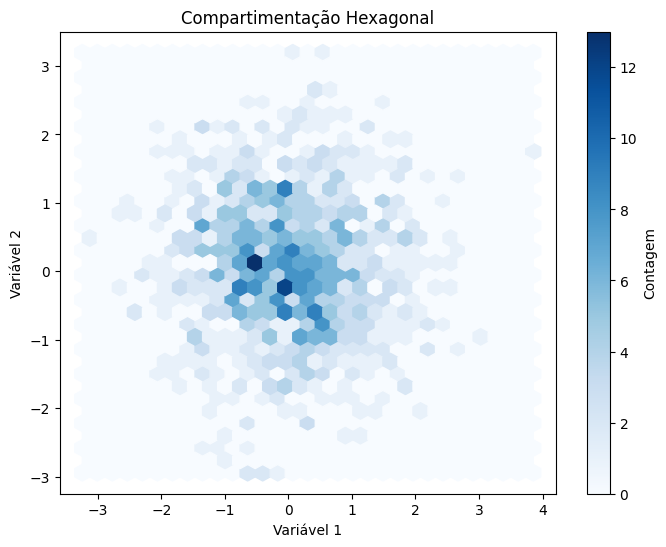

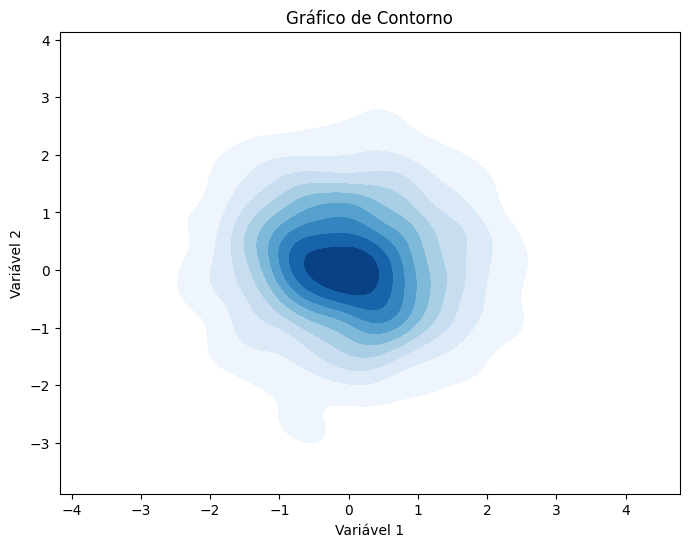

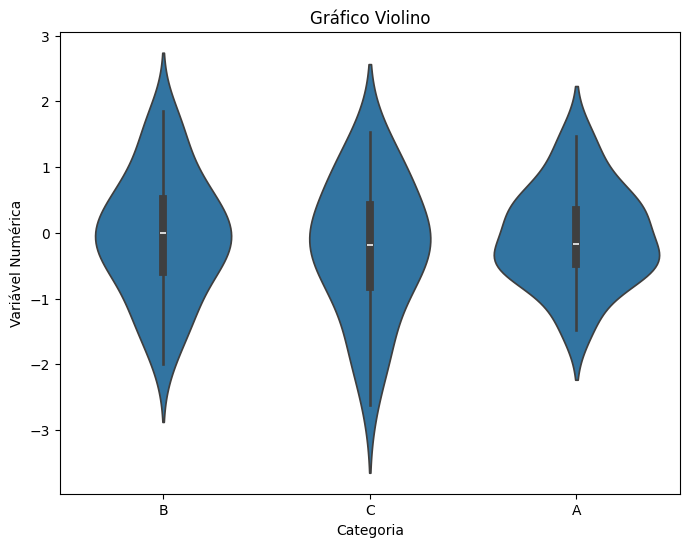

In [19]:
# Exemplo de dados categóricos para Tabela de Contingência
dados_categoricos = pd.DataFrame({
    'Categoria_1': np.random.choice(['A', 'B', 'C'], size=100),
    'Categoria_2': np.random.choice(['X', 'Y', 'Z'], size=100)
})

# 1. Tabelas de Contingência
tabela_contingencia = pd.crosstab(dados_categoricos['Categoria_1'], dados_categoricos['Categoria_2'])
print("Tabela de Contingência:")
print(tabela_contingencia)

# Exemplo de dados numéricos para gráficos
np.random.seed(42)
dados_numericos = pd.DataFrame({
    'Variavel_1': np.random.randn(1000),
    'Variavel_2': np.random.randn(1000)
})

# 2. Compartimentação Hexagonal
plt.figure(figsize=(8, 6))
plt.hexbin(dados_numericos['Variavel_1'], dados_numericos['Variavel_2'], gridsize=30, cmap='Blues')
plt.colorbar(label='Contagem')
plt.title("Compartimentação Hexagonal")
plt.xlabel("Variável 1")
plt.ylabel("Variável 2")
plt.show()

# 3. Gráficos de Contorno
plt.figure(figsize=(8, 6))
sns.kdeplot(x=dados_numericos['Variavel_1'], y=dados_numericos['Variavel_2'], cmap='Blues', fill=True)
plt.title("Gráfico de Contorno")
plt.xlabel("Variável 1")
plt.ylabel("Variável 2")
plt.show()

# 4. Gráficos Violino
plt.figure(figsize=(8, 6))
sns.violinplot(x=dados_categoricos['Categoria_1'], y=dados_numericos['Variavel_1'])
plt.title("Gráfico Violino")
plt.xlabel("Categoria")
plt.ylabel("Variável Numérica")
plt.show()
